In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import requests
import json
import os
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

# Part 1

In [2]:
link = 'https://ies-python-midterm.s3.eu-central-1.amazonaws.com/studentsSets/30241262.zip'

In [5]:
df_WMB = pd.DataFrame(pd.read_csv('data/WMB.csv')).set_index('Date')
df_KEY = pd.DataFrame(pd.read_csv('data/KEY.csv')).set_index('Date')
df_VLO = pd.DataFrame(pd.read_csv('data/VLO.csv')).set_index('Date')

In [6]:
df = pd.concat([df_KEY, df_VLO, df_WMB], axis = 1,keys= ['KEY', 'VLO', 'WMB'])
df

KEY                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2017-11-13  17.969999  17.400000  17.500000  17.920000   8340000.0  15.102299   
2017-11-14  18.280001  17.820000  17.850000  18.250000  12813900.0  15.380411   
2017-11-15  18.320000  17.920000  18.059999  18.139999  11023000.0  15.287705   
2017-11-16  18.340000  18.110001  18.240000  18.129999   7449200.0  15.279279   
2017-11-17  18.350000  18.000000  18.020000  18.309999   9553700.0  15.430977   
...               ...        ...        ...        ...         ...        ...   
2022-11-07  18.430000  18.100000  18.340000  18.330000   6444200.0  18.330000   
2022-11-08  18.490000  18.139999  18.330000  18.330000   6953300.0  18.330000   
2022-11-09  18.200001  17.870001  18.139999  17.900000   9855500.0  17.900000   
2022-11-10  19.480000  18.530001  18.549999  19.450001  15582900.0  19.450001   
2022-11-11  20.040001  19.520000  19.530001  19.830000  12219900.0  19.830000   

                   VLO                                                 \
                  High         Low        Open       Close     Volume   
Date                                                                    
2017-11-13   81.519997   80.610001   81.239998   80.669998  2568500.0   
2017-11-14   81.589996   80.489998   80.550003   81.370003  3108700.0   
2017-11-15   81.690002   80.000000   80.889999   81.480003  3122000.0   
2017-11-16   82.610001   81.209999   81.309998   82.120003  4322600.0   
2017-11-17   82.919998   81.750000   81.849998   82.879997  2897400.0   
...                ...         ...         ...         ...        ...   
2022-11-07  132.929993  128.820007  129.080002  131.779999  3767900.0   
2022-11-08  133.110001  129.529999  131.820007  132.250000  3736900.0   
2022-11-09  133.550003  127.260002  131.570007  128.000000  4125900.0   
2022-11-10  132.600006  128.199997  130.720001  132.449997  2916300.0   
2022-11-11  136.169998  132.699997  134.440002  133.960007  4438000.0   

                              WMB                                              \
             Adj Close       High        Low       Open      Close     Volume   
Date                                                                            
2017-11-13   65.271454  28.530001  28.180000  28.490000  28.230000  3943200.0   
2017-11-14   65.837830  28.170000  27.670000  28.139999  27.719999  5536300.0   
2017-11-15   65.926819  27.730000  27.209999  27.500000  27.500000  4466100.0   
2017-11-16   66.444687  27.510000  26.980000  27.469999  27.020000  4871700.0   
2017-11-17   67.059593  27.350000  26.820000  27.030001  27.260000  4270400.0   
...                ...        ...        ...        ...        ...        ...   
2022-11-07  131.779999  34.070000  33.490002  33.669998  33.840000  5816400.0   
2022-11-08  132.250000  34.119999  33.529999  33.869999  33.959999  4776900.0   
2022-11-09  128.000000  33.820000  32.590000  33.799999  32.669998  5655700.0   
2022-11-10  132.449997  33.650002  33.020000  33.320000  33.619999  9389200.0   
2022-11-11  133.960007  34.240002  33.560001  34.060001  34.080002  5767700.0   

                       
            Adj Close  
Date                   
2017-11-13  21.609632  
2017-11-14  21.219236  
2017-11-15  21.050827  
2017-11-16  20.683395  
2017-11-17  20.867113  
...               ...  
2022-11-07  33.840000  
2022-11-08  33.959999  
2022-11-09  32.669998  
2022-11-10  33.619999  
2022-11-11  34.080002  

[1259 rows x 18 columns]

In [7]:
df.index = pd.to_datetime(df.index)

# 1.

In [8]:
idx = pd.IndexSlice

In [11]:
df.loc[:, idx['KEY','Adj Close']] == df.loc[:, idx['KEY','Close']]

Date
2017-11-13    False
2017-11-14    False
2017-11-15    False
2017-11-16    False
2017-11-17    False
              ...  
2022-11-07     True
2022-11-08     True
2022-11-09     True
2022-11-10     True
2022-11-11     True
Length: 1259, dtype: bool

In [12]:
df.loc[:, idx['VLO','Adj Close']] == df.loc[:, idx['VLO','Close']]

Date
2017-11-13    False
2017-11-14    False
2017-11-15    False
2017-11-16    False
2017-11-17    False
              ...  
2022-11-07     True
2022-11-08     True
2022-11-09     True
2022-11-10     True
2022-11-11     True
Length: 1259, dtype: bool

In [14]:
df.loc[:, idx['WMB','Adj Close']] == df.loc[:, idx['WMB','Close']]

Date
2017-11-13    False
2017-11-14    False
2017-11-15    False
2017-11-16    False
2017-11-17    False
              ...  
2022-11-07     True
2022-11-08     True
2022-11-09     True
2022-11-10     True
2022-11-11     True
Length: 1259, dtype: bool

# 2 

In [15]:
df.loc[:, idx[:,'Adj Close']].max()

KEY  Adj Close     26.801819
VLO  Adj Close    145.080002
WMB  Adj Close     37.820000
dtype: float64

In [16]:
df.loc[:, idx[:,'Adj Close']].min()

KEY  Adj Close     7.501689
VLO  Adj Close    29.014471
WMB  Adj Close     8.199340
dtype: float64

# 3

In [17]:
df_WMB['ln_returns'] = np.log(df_WMB['Adj Close'] / df_WMB['Adj Close'].shift())
df_KEY['ln_returns'] = np.log(df_KEY['Adj Close'] / df_KEY['Adj Close'].shift())
df_VLO['ln_returns'] = np.log(df_VLO['Adj Close'] / df_VLO['Adj Close'].shift())

df = pd.concat([df_KEY, df_VLO, df_WMB], axis = 1,keys= ['KEY', 'VLO', 'WMB'])
df

KEY                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2017-11-13  17.969999  17.400000  17.500000  17.920000   8340000.0  15.102299   
2017-11-14  18.280001  17.820000  17.850000  18.250000  12813900.0  15.380411   
2017-11-15  18.320000  17.920000  18.059999  18.139999  11023000.0  15.287705   
2017-11-16  18.340000  18.110001  18.240000  18.129999   7449200.0  15.279279   
2017-11-17  18.350000  18.000000  18.020000  18.309999   9553700.0  15.430977   
...               ...        ...        ...        ...         ...        ...   
2022-11-07  18.430000  18.100000  18.340000  18.330000   6444200.0  18.330000   
2022-11-08  18.490000  18.139999  18.330000  18.330000   6953300.0  18.330000   
2022-11-09  18.200001  17.870001  18.139999  17.900000   9855500.0  17.900000   
2022-11-10  19.480000  18.530001  18.549999  19.450001  15582900.0  19.450001   
2022-11-11  20.040001  19.520000  19.530001  19.830000  12219900.0  19.830000   

                              VLO                          ...             \
           ln_returns        High         Low        Open  ...     Volume   
Date                                                       ...              
2017-11-13        NaN   81.519997   80.610001   81.239998  ...  2568500.0   
2017-11-14   0.018248   81.589996   80.489998   80.550003  ...  3108700.0   
2017-11-15  -0.006046   81.690002   80.000000   80.889999  ...  3122000.0   
2017-11-16  -0.000551   82.610001   81.209999   81.309998  ...  4322600.0   
2017-11-17   0.009879   82.919998   81.750000   81.849998  ...  2897400.0   
...               ...         ...         ...         ...  ...        ...   
2022-11-07   0.005470  132.929993  128.820007  129.080002  ...  3767900.0   
2022-11-08   0.000000  133.110001  129.529999  131.820007  ...  3736900.0   
2022-11-09  -0.023738  133.550003  127.260002  131.570007  ...  4125900.0   
2022-11-10   0.083046  132.600006  128.199997  130.720001  ...  2916300.0   
2022-11-11   0.019349  136.169998  132.699997  134.440002  ...  4438000.0   

                                         WMB                                   \
             Adj Close ln_returns       High        Low       Open      Close   
Date                                                                            
2017-11-13   65.271454        NaN  28.530001  28.180000  28.490000  28.230000   
2017-11-14   65.837830   0.008640  28.170000  27.670000  28.139999  27.719999   
2017-11-15   65.926819   0.001351  27.730000  27.209999  27.500000  27.500000   
2017-11-16   66.444687   0.007825  27.510000  26.980000  27.469999  27.020000   
2017-11-17   67.059593   0.009212  27.350000  26.820000  27.030001  27.260000   
...                ...        ...        ...        ...        ...        ...   
2022-11-07  131.779999   0.023494  34.070000  33.490002  33.669998  33.840000   
2022-11-08  132.250000   0.003560  34.119999  33.529999  33.869999  33.959999   
2022-11-09  128.000000  -0.032664  33.820000  32.590000  33.799999  32.669998   
2022-11-10  132.449997   0.034175  33.650002  33.020000  33.320000  33.619999   
2022-11-11  133.960007   0.011336  34.240002  33.560001  34.060001  34.080002   

                                             
               Volume  Adj Close ln_returns  
Date                                         
2017-11-13  3943200.0  21.609632        NaN  
2017-11-14  5536300.0  21.219236  -0.018231  
2017-11-15  4466100.0  21.050827  -0.007968  
2017-11-16  4871700.0  20.683395  -0.017609  
2017-11-17  4270400.0  20.867113   0.008843  
...               ...        ...        ...  
2022-11-07  5816400.0  33.840000   0.008905  
2022-11-08  4776900.0  33.959999   0.003540  
2022-11-09  5655700.0  32.669998  -0.038726  
2022-11-10  9389200.0  33.619999   0.028664  
2022-11-11  5767700.0  34.080002   0.013590  

[1259 rows x 21 columns]

In [19]:
df.loc[:, idx[:,'ln_returns']].apply([np.min,np.max, np.mean, np.median])

,KEY,VLO,WMB
,ln_returns,ln_returns,ln_returns
amin,-0.242377,-0.213452,-0.271058
amax,0.170289,0.271572,0.173631
mean,0.000216,0.000572,0.000362
median,0.000512,0.000854,0.000708


# 4

In [21]:
df.loc[:, idx[:,'ln_returns']].idxmax()

KEY  ln_returns    2020-11-09
VLO  ln_returns    2020-11-09
WMB  ln_returns    2020-03-13
dtype: object

In [22]:
df.loc[:, idx[:,'ln_returns']].idxmin()

KEY  ln_returns    2020-03-16
VLO  ln_returns    2020-03-12
WMB  ln_returns    2020-03-18
dtype: object


# 5 

In [29]:
df.index = pd.to_datetime(df.index)

In [31]:
df_weekly = df.resample('W').ffill()
df_weekly

KEY                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2017-11-19  18.350000  18.000000  18.020000  18.309999   9553700.0  15.430977   
2017-11-26  18.290001  18.120001  18.290001  18.139999   3628800.0  15.287705   
2017-12-03  19.209999  18.540001  19.010000  19.129999  15610000.0  16.215902   
2017-12-10  19.889999  19.600000  19.820000  19.889999  10344200.0  16.860130   
2017-12-17  19.969999  19.590000  19.629999  19.760000  16624300.0  16.749937   
...               ...        ...        ...        ...         ...        ...   
2022-10-16  17.200001  16.430000  16.799999  16.480000  16069600.0  16.480000   
2022-10-23  16.920000  15.750000  15.950000  16.900000  21911300.0  16.900000   
2022-10-30  18.110001  17.670000  17.850000  18.100000   9137300.0  18.100000   
2022-11-06  18.389999  17.889999  18.100000  18.230000   9812300.0  18.230000   
2022-11-13  20.040001  19.520000  19.530001  19.830000  12219900.0  19.830000   

                              VLO                          ...             \
           ln_returns        High         Low        Open  ...     Volume   
Date                                                       ...              
2017-11-19   0.009879   82.919998   81.750000   81.849998  ...  2897400.0   
2017-11-26  -0.001102   82.849998   82.059998   82.680000  ...  1623400.0   
2017-12-03   0.007872   85.779999   82.519997   85.370003  ...  4123200.0   
2017-12-10   0.007570   87.730003   85.959999   86.269997  ...  3533300.0   
2017-12-17   0.012220   88.400002   87.500000   87.650002  ...  6579300.0   
...               ...         ...         ...         ...  ...        ...   
2022-10-16  -0.013860  121.800003  113.620003  119.959999  ...  3737800.0   
2022-10-23   0.064144  128.300003  124.110001  125.160004  ...  3401900.0   
2022-10-30   0.019526  129.770004  125.059998  128.589996  ...  3505100.0   
2022-11-06   0.021625  133.270004  127.800003  132.360001  ...  3202400.0   
2022-11-13   0.019349  136.169998  132.699997  134.440002  ...  4438000.0   

                                         WMB                                   \
             Adj Close ln_returns       High        Low       Open      Close   
Date                                                                            
2017-11-19   67.059593   0.009212  27.350000  26.820000  27.030001  27.260000   
2017-11-26   67.116707  -0.001215  28.420000  27.860001  27.870001  28.070000   
2017-12-03   68.683456  -0.017080  29.620001  29.120001  29.290001  29.290001   
2017-12-10   71.482384   0.023213  28.700001  28.219999  28.600000  28.549999   
2017-12-17   71.963799   0.008083  30.000000  29.580000  29.799999  29.730000   
...                ...        ...        ...        ...        ...        ...   
2022-10-16  114.120003  -0.057382  30.680000  29.379999  30.430000  29.410000   
2022-10-23  127.739998   0.026173  31.760000  30.690001  30.969999  31.520000   
2022-10-30  125.980003  -0.018014  32.889999  32.220001  32.840000  32.669998   
2022-11-06  128.720001  -0.007662  33.830002  33.090000  33.720001  33.540001   
2022-11-13  133.960007   0.011336  34.240002  33.560001  34.060001  34.080002   

                                              
                Volume  Adj Close ln_returns  
Date                                          
2017-11-19   4270400.0  20.867113   0.008843  
2017-11-26   3377400.0  21.487156   0.011466  
2017-12-03   6037000.0  22.421045   0.008228  
2017-12-10   8941800.0  22.085527   0.002806  
2017-12-17  10207000.0  22.998346   0.001683  
...                ...        ...        ...  
2022-10-16   6948300.0  29.410000  -0.033437  
2022-10-23   8867500.0  31.520000   0.019866  
2022-10-30   6079600.0  32.669998   0.005217  
2022-11-06   5524100.0  33.540001   0.011696  
2022-11-13   5767700.0  34.080002   0.013590  

[261 rows 

In [33]:
df_weekly.loc[:, idx[:,'Volume']].mean()

KEY  Volume    1.054702e+07
VLO  Volume    4.137581e+06
WMB  Volume    9.378148e+06
dtype: float64

# 6 

In [34]:
df.loc[:, idx[:,'ln_returns']].sum()

KEY  ln_returns    0.272349
VLO  ln_returns    0.718987
WMB  ln_returns    0.455572
dtype: float64

# 7

In [35]:
KEY_ln_returns = df.loc[:, idx['KEY', 'ln_returns']]
VLO_ln_returns = df.loc[:, idx['VLO', 'ln_returns']]
WMB_ln_returns = df.loc[:, idx['WMB', 'ln_returns']]

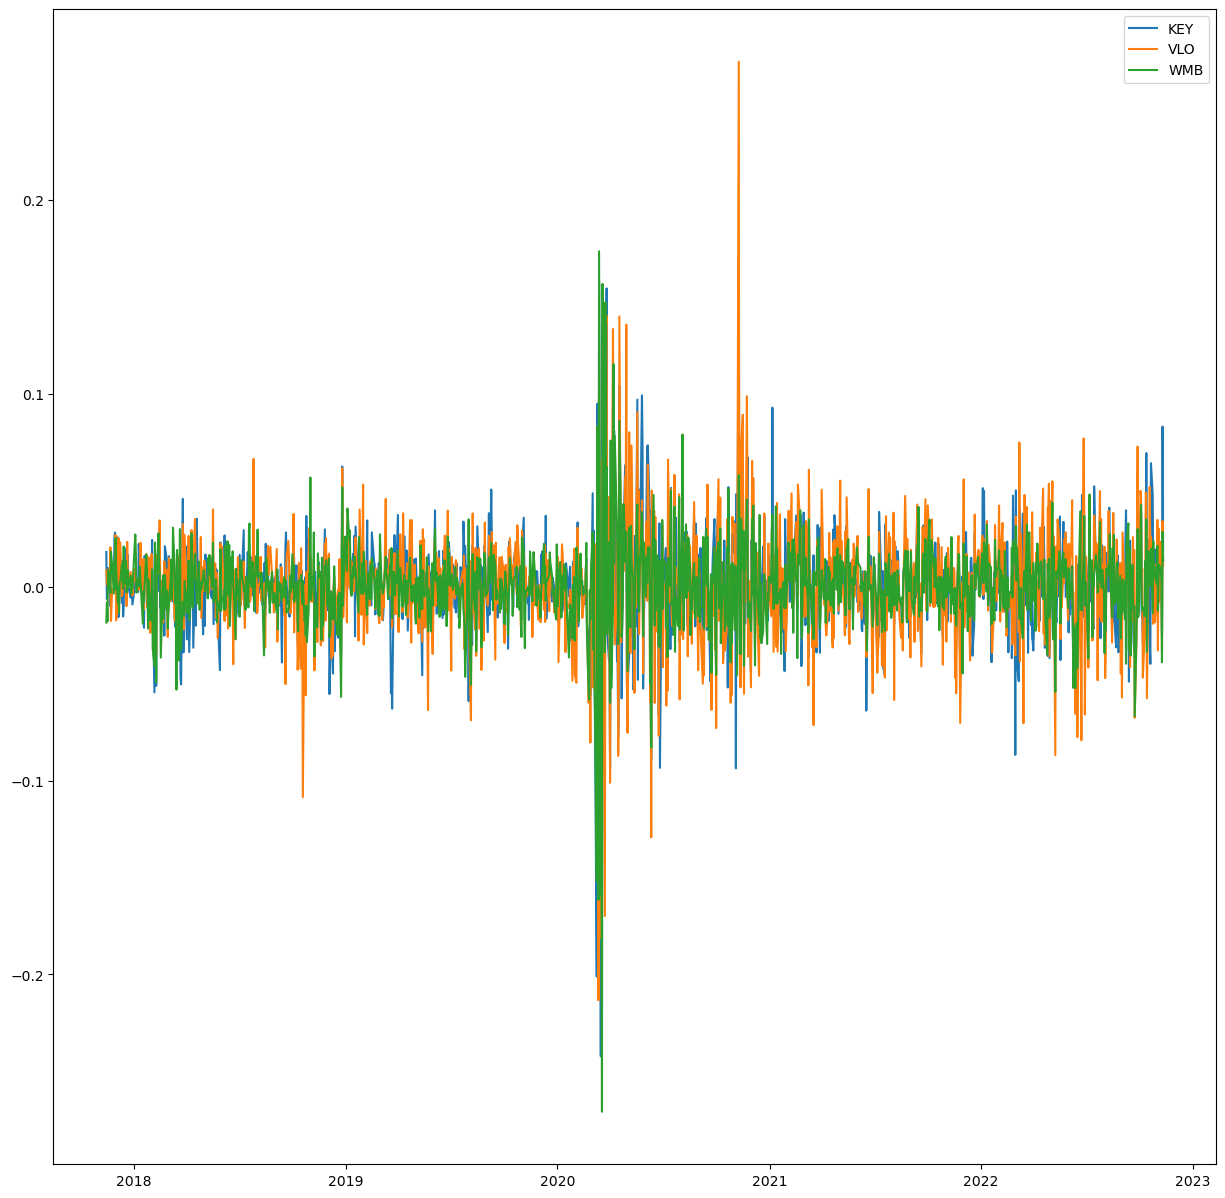

In [46]:
plt.figure(figsize=(15,15))

plt.plot(KEY_ln_returns)
plt.plot(VLO_ln_returns)
plt.plot(WMB_ln_returns)

plt.legend(['KEY', 'VLO', 'WMB'])

plt.show()

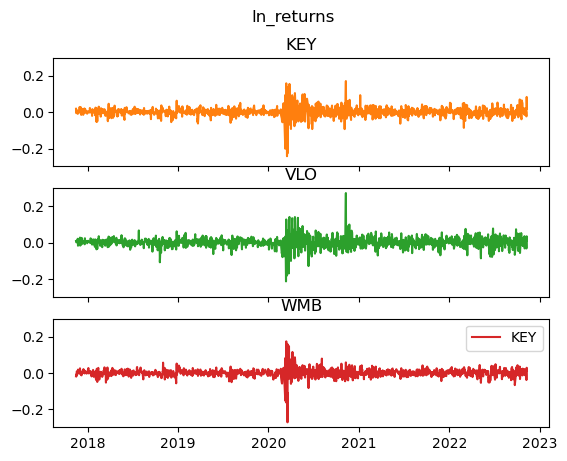

In [57]:
fig, axs = plt.subplots(3, sharex=True, sharey=True)
fig.suptitle('ln_returns')
axs[0].plot(KEY_ln_returns, 'tab:orange')
axs[0].set_title('KEY')
axs[1].plot(VLO_ln_returns, 'tab:green')
axs[1].set_title('VLO')
axs[2].plot(WMB_ln_returns, 'tab:red')
axs[2].set_title('WMB')

plt.legend(['KEY', 'VLO', 'WMB'])

plt.show()

# 8

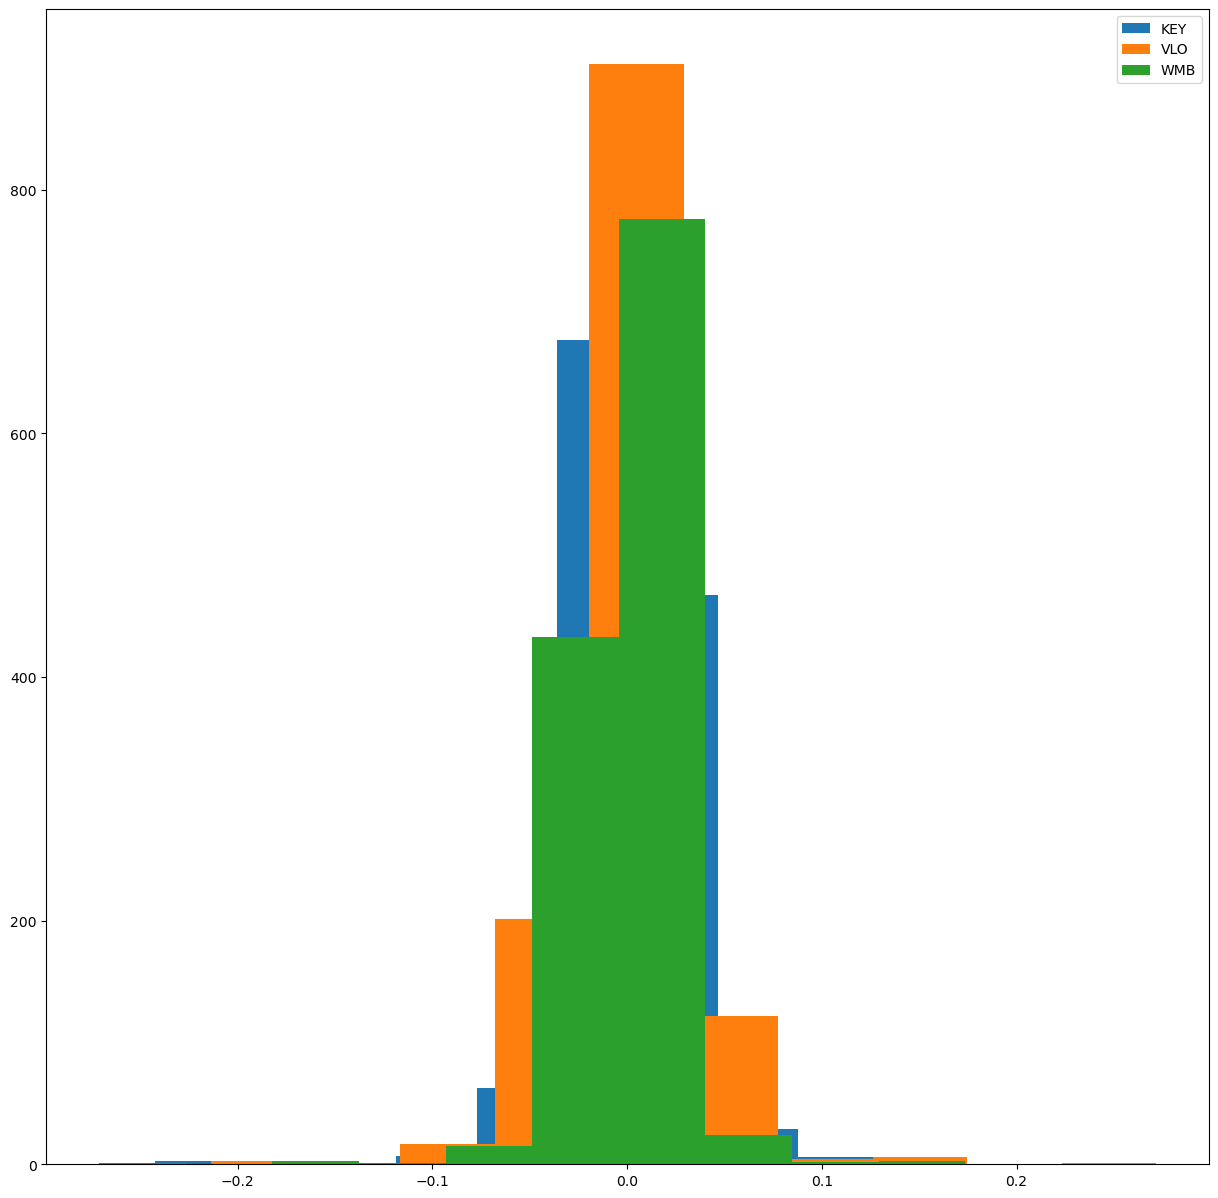

In [47]:
plt.figure(figsize=(15,15))

plt.hist(KEY_ln_returns)
plt.hist(VLO_ln_returns)
plt.hist(WMB_ln_returns)

plt.legend(['KEY', 'VLO', 'WMB'])

plt.show()

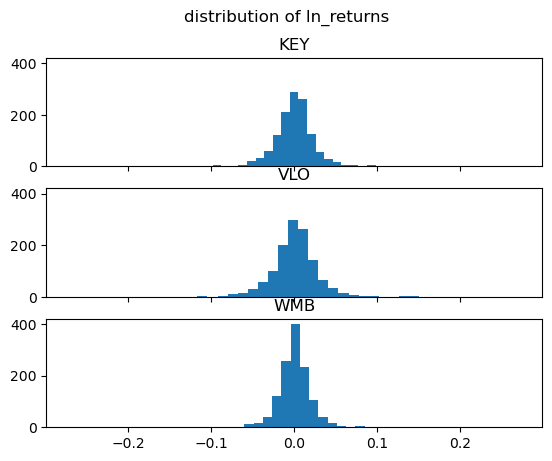

In [73]:
fig, axs = plt.subplots(3, sharex=True, sharey=True)
fig.suptitle('distribution of ln_returns')
axs[0].hist(KEY_ln_returns, bins = 40)
axs[0].set_title('KEY',)
axs[1].hist(VLO_ln_returns, bins = 40)
axs[1].set_title('VLO')
axs[2].hist(WMB_ln_returns, bins = 40)
axs[2].set_title('WMB')


plt.show()

# Part 2

In [118]:
data = pd.read_csv('https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv')
data

,Symbol,Security,GICS Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981
...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,"Louisville, Kentucky",06.10.1997,1997
499,ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois",23.12.2019,1969
500,ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana",07.08.2001,1927
501,ZION,Zions Bancorporation,Financials,"Salt Lake City, Utah",22.06.2001,1873


# 1

In [119]:
data.isnull().sum()

Symbol          0
Security        0
GICS Sector     0
hq              0
included       45
Founded         0
dtype: int64

# 2

In [120]:
data_adj = data.dropna(how='any',axis=0) 
data_adj.isnull().sum()

Symbol         0
Security       0
GICS Sector    0
hq             0
included       0
Founded        0
dtype: int64

In [121]:
data_adj['Founded'].describe()

count      458
unique     186
top       1998
freq        10
Name: Founded, dtype: object

In [122]:
pd.to_datetime(data_adj['Founded'], dayfirst=True,errors='coerce')

0     1902-01-01
1     1916-01-01
2     1888-01-01
3            NaT
4     1981-01-01
         ...    
498   1997-01-01
499   1969-01-01
500   1927-01-01
501   1873-01-01
502   1952-01-01
Name: Founded, Length: 458, dtype: datetime64[ns]

In [ ]:
data_adj['age'] = 